# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_names = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
for city in cities:
    # Save config information
    url = "http://api.openweathermap.org/data/2.5/weather?"
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    # Get weather data
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_names.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])

        # Get the temperature from the response
        print(f"Processing record: {city}.")
        time.sleep(1)
    except:
        print (f"{city} not found. Skipping...")
print (f"Data retrieval finished")

Processing record: albany.
Processing record: chuy.
Processing record: novoagansk.
Processing record: tezu.
Processing record: half moon bay.
Processing record: riyadh.
nizhneyansk not found. Skipping...
Processing record: himare.
Processing record: port elizabeth.
Processing record: barrow.
Processing record: sao miguel do tapuio.
Processing record: canutama.
Processing record: samarai.
Processing record: punta arenas.
Processing record: isla aguada.
Processing record: port alfred.
Processing record: lazaro cardenas.
Processing record: ushuaia.
Processing record: upernavik.
Processing record: dikson.
el badari not found. Skipping...
Processing record: ust-kuyga.
Processing record: jamestown.
Processing record: shingu.
Processing record: hobart.
Processing record: norman wells.
Processing record: nishihara.
Processing record: aklavik.
Processing record: ahipara.
Processing record: vaini.
Processing record: tiksi.
wahran not found. Skipping...
Processing record: inhambane.
Processing re

Processing record: mayo.
Processing record: ratnagiri.
Processing record: pisco.
Processing record: mount gambier.
Processing record: san francisco de becerra.
Processing record: bosaso.
Processing record: kurya.
Processing record: saint-louis.
Processing record: mahebourg.
Processing record: filadelfia.
Processing record: campina verde.
Processing record: udachnyy.
Processing record: totness.
Processing record: yuci.
Processing record: la ciotat.
Processing record: gimli.
Processing record: wuwei.
mrirt not found. Skipping...
Processing record: georgetown.
Processing record: brownsville.
Processing record: lavrentiya.
Processing record: ayan.
Processing record: skegness.
Processing record: yatou.
Processing record: ahuimanu.
Processing record: ketchikan.
Processing record: coihaique.
Processing record: alofi.
Processing record: vila velha.
Processing record: fairbanks.
Processing record: hovd.
marcona not found. Skipping...
Processing record: tigil.
Processing record: pastavy.
Process

Processing record: santa ines.
Processing record: kassala.
Processing record: storsteinnes.
Processing record: pacific grove.
Processing record: seymchan.
Processing record: onega.
barawe not found. Skipping...
Processing record: kongwa.
Processing record: acarau.
Processing record: karasjok.
Processing record: paamiut.
Processing record: mountain home.
Processing record: bezopasnoye.
Processing record: lluta.
Processing record: moindou.
Processing record: staryy nadym.
Processing record: saint-joseph.
Processing record: san policarpo.
Processing record: vestmannaeyjar.
Processing record: ljungby.
Processing record: bilma.
Processing record: evensk.
Processing record: road town.
fort saint john not found. Skipping...
Processing record: manicore.
Processing record: manono.
Processing record: poltavka.
Processing record: aracataca.
Processing record: orzhytsya.
Processing record: jieshi.
Processing record: stephenville.
Processing record: dalbandin.
Processing record: maniitsoq.
Processi

In [11]:
#Create Dataframe for csv
weather_df = pd.DataFrame({"City":city_names, 
                           "Latitude": lat, 
                           "Longitude": lng, 
                           "Max Temp": max_temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country,
                           "Date": date})

weather_df.to_csv("cities.csv")
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,69.01,37,0,3.49,US,1604947912
1,Chui,-33.70,-53.46,67.73,66,100,11.86,UY,1604947866
2,Novoagansk,61.94,76.66,24.75,98,95,3.71,RU,1604947918
3,Tezu,27.92,96.17,67.26,44,0,3.80,IN,1604947919
4,Half Moon Bay,37.46,-122.43,55.40,35,1,6.93,US,1604947707
...,...,...,...,...,...,...,...,...,...
552,Talakan,50.32,130.37,8.24,91,0,3.27,RU,1604948557
553,Tailai,46.38,123.40,21.67,79,29,8.70,CN,1604948558
554,Verkhnevilyuysk,63.45,120.32,10.54,95,100,8.70,RU,1604948559
555,Belyy Yar,53.60,91.39,35.60,80,0,11.18,RU,1604948560


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Import csv and print description DF
weather_df = pd.read_csv("cities.csv")
weather_df.describe()

,Unnamed: 0,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,278.000000,20.819031,18.217343,56.859731,71.915619,51.346499,8.852531,1.604948e+09
std,160.936323,33.760642,90.218379,25.861889,20.584229,40.682799,6.193559,1.953657e+02
min,0.000000,-54.800000,-175.200000,-26.460000,10.000000,0.000000,0.380000,1.604948e+09
25%,139.000000,-7.260000,-62.070000,38.620000,60.000000,1.000000,4.610000,1.604948e+09
50%,278.000000,25.720000,20.920000,64.400000,77.000000,54.000000,7.650000,1.604948e+09
75%,417.000000,50.100000,99.000000,77.430000,87.000000,92.000000,12.170000,1.604948e+09
max,556.000000,78.220000,179.320000,96.510000,100.000000,100.000000,41.810000,1.604949e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

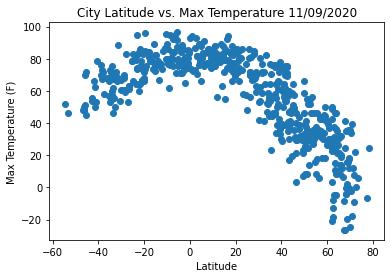

In [14]:
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.title('City Latitude vs. Max Temperature 11/09/2020')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('../output_data/Fig1.png')
plt.show()

## Latitude vs. Humidity Plot

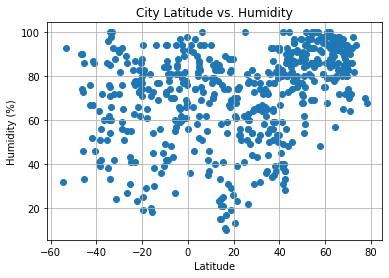

In [10]:
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.title('City Latitude vs. Humidity')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression